<a href="https://colab.research.google.com/github/gudals6676/Deep_Learning/blob/main/07_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98%2C_%EC%B5%9C%EC%A0%81%ED%99%94%ED%95%A8%EC%88%98_%EB%B9%84%EA%B5%90(%ED%8C%A8%EC%85%98%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 한 번 실습했던 패션데이터를 가지고 활성화함수, 최적화함수를 변화시켜가며 확인해보자!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
data = fashion_mnist.load_data()
data

4423680/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(X_train, y_train), (X_test, y_test) = data

#X_train = data[0][0]
#y_train = data[0][1]
#X_test = data[1][0]
#y_test = data[1][1]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


- 정답 데이터 인코딩

In [ ]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [ ]:
y_train_one_hot.shape

(60000, 10)

### 활성화함수, 최적화함수 별 비교
- 1. 중간층 활성화 함수 : sigmoid, 최적화 함수 : SGD
- 2. 중간층 활성화 함수 : relu, 최적화 함수 : SGD
- 3. 중간층 활성화 함수 : relu, 최적화 함수 : Adam

 - 총 3 개의 신경망을 구성하고 그결과를 비교해보자

In [ ]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential     # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense, Flatten   # 신경망의 층을 구성

In [ ]:
from tqdm import tqdm

In [ ]:
from tensorflow.python.keras.engine import input_layer
md = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
md.add(Flatten(input_shape=(28, 28))) # 즉 리쉐입이 필요가 없음


# 중간층
md.add(Dense(300, activation="sigmoid"))  # 하나의 층
md.add(Dense(400, activation="sigmoid"))  # 하나의 층
md.add(Dense(300, activation="sigmoid"))  # 하나의 층
md.add(Dense(100, activation="sigmoid"))  # 하나의 층


# 출력층
md.add(Dense(10, activation="softmax"))

md.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 400)               120400    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 507,310
Trainable params: 507,310
Non-trainable params: 0
________________________________________________

In [ ]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
md.compile(loss="categorical_crossentropy",
           optimizer = "SGD",          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

In [ ]:
h = md.fit(X_train,y_train_one_hot,
           validation_split=0.2,
           epochs=50, batch_size = 128, verbose = 1)
# validation_split : 자동으로 train데이터에서 검증 데이터를 분리시켜주는 명령
#verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력X, 1: bar형태(디폴트), 2:bar가 없는 형태로 출력)
# 주의점 -> 분리시켜줄 때 뒤에서부터 20%를 잘라줌
# 일정한 값으로 정렬돼 있는 데이터에는 사용 불가
# train_test_spllit 명령으로 사전에 랜덤 샘플링을 진행했기 때문에 바로 validation_split 명령 사용 가능!

Epoch 1/50
375/375 [==============================] - 4s 4ms/step - loss: 2.3018 - acc: 0.1240 - val_loss: 2.2899 - val_acc: 0.1998
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2821 - acc: 0.2110 - val_loss: 2.2737 - val_acc: 0.2004
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2632 - acc: 0.2828 - val_loss: 2.2509 - val_acc: 0.4233
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2332 - acc: 0.3582 - val_loss: 2.2117 - val_acc: 0.4137
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 2.1758 - acc: 0.3389 - val_loss: 2.1303 - val_acc: 0.3088
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 2.0592 - acc: 0.3020 - val_loss: 1.9751 - val_acc: 0.2603
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 1.8831 - acc: 0.3121 - val_loss: 1.7973 - val_acc: 0.3201
Epoch 8/50
375/375 [==============================] - 1s 3ms/step - loss: 1.

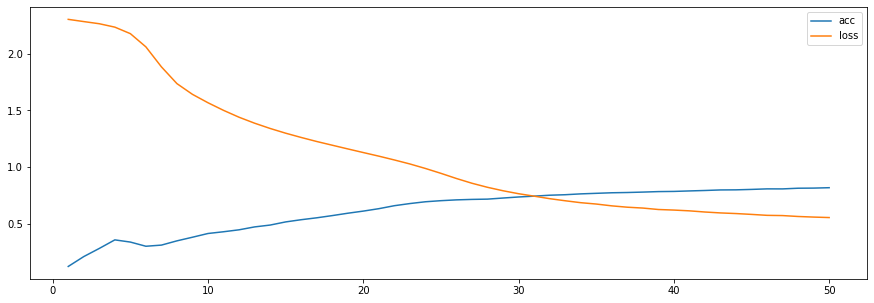

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 51, 1),
         h.history['acc'],
         label='acc'
         )

plt.plot(range(1, 51, 1),
         h.history['loss'],
         label='loss'
         )

plt.legend()
plt.show()

In [ ]:
# 모델 평가
md.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.5925 - acc: 0.8049


[0.5925444960594177, 0.8048999905586243]

In [ ]:
md1 = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
md1.add(Flatten(input_shape=(28, 28))) # 즉 리쉐입이 필요가 없음


# 중간층
md1.add(Dense(300, activation="relu"))  # 하나의 층
md1.add(Dense(400, activation="relu"))  # 하나의 층
md1.add(Dense(300, activation="relu"))  # 하나의 층
md1.add(Dense(100, activation="relu"))  # 하나의 층


# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
md1.add(Dense(10, activation="softmax"))

md1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_11 (Dense)             (None, 400)               120400    
_________________________________________________________________
dense_12 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 507,310
Trainable params: 507,310
Non-trainable params: 0
________________________________________________

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
# 최적화함수의 하이퍼파라미터를 변경하기 위해 임포트 해줌

In [ ]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
md1.compile(loss="categorical_crossentropy",
           optimizer =SGD(lr=0.001),          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
h1 = md1.fit(X_train,y_train_one_hot,
           validation_split=0.2,
           epochs=50, batch_size = 128, verbose = 1)
# validation_split : 자동으로 train데이터에서 검증 데이터를 분리시켜주는 명령
#verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력X, 1: bar형태(디폴트), 2:bar가 없는 형태로 출력)
# 주의점 -> 분리시켜줄 때 뒤에서부터 20%를 잘라줌
# 일정한 값으로 정렬돼 있는 데이터에는 사용 불가
# train_test_spllit 명령으로 사전에 랜덤 샘플링을 진행했기 때문에 바로 validation_split 명령 사용 가능!

# loss가 nan이 뜰 경우는 학습자체가 제대로 진행이 되고 있지 않다는 뜻
# 조금더 정밀한 학습이 필요할 수 있음.

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 2.9765 - acc: 0.7138 - val_loss: 0.6877 - val_acc: 0.7709
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5951 - acc: 0.7981 - val_loss: 0.6043 - val_acc: 0.7924
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5185 - acc: 0.8198 - val_loss: 0.5534 - val_acc: 0.8126
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4745 - acc: 0.8351 - val_loss: 0.5297 - val_acc: 0.8162
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4452 - acc: 0.8438 - val_loss: 0.5212 - val_acc: 0.8228
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4198 - acc: 0.8511 - val_loss: 0.4944 - val_acc: 0.8310
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4011 - acc: 0.8577 - val_loss: 0.4906 - val_acc: 0.8321
Epoch 8/50
375/375 [==============================] - 1s 3ms/step - loss: 0.

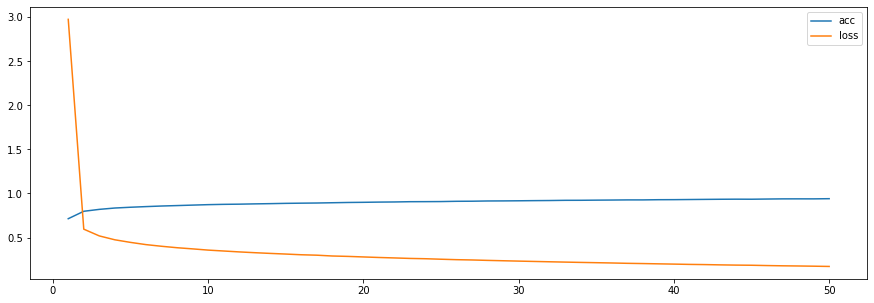

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 51, 1),
         h1.history['acc'],
         label='acc'
         )

plt.plot(range(1, 51, 1),
         h1.history['loss'],
         label='loss'
         )

plt.legend()
plt.show()

In [ ]:
# 모델 평가
md1.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.4899 - acc: 0.8512


[0.48986417055130005, 0.8511999845504761]

In [ ]:
md2 = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
md2.add(Flatten(input_shape=(28, 28))) # 즉 리쉐입이 필요가 없음


# 중간층
md2.add(Dense(300, activation="relu"))  # 하나의 층
md2.add(Dense(400, activation="relu"))  # 하나의 층
md2.add(Dense(300, activation="relu"))  # 하나의 층
md2.add(Dense(100, activation="relu"))  # 하나의 층


# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
md2.add(Dense(10, activation="softmax"))

md2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 400)               120400    
_________________________________________________________________
dense_17 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_18 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 507,310
Trainable params: 507,310
Non-trainable params: 0
________________________________________________

In [ ]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
md2.compile(loss="categorical_crossentropy",
           optimizer = "Adam",          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

In [ ]:
h2 = md2.fit(X_train,y_train_one_hot,
           validation_split=0.2,
           epochs=50, batch_size = 128, verbose = 1)
# validation_split : 자동으로 train데이터에서 검증 데이터를 분리시켜주는 명령
#verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력X, 1: bar형태(디폴트), 2:bar가 없는 형태로 출력)
# 주의점 -> 분리시켜줄 때 뒤에서부터 20%를 잘라줌
# 일정한 값으로 정렬돼 있는 데이터에는 사용 불가
# train_test_spllit 명령으로 사전에 랜덤 샘플링을 진행했기 때문에 바로 validation_split 명령 사용 가능!

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 1.5462 - acc: 0.7727 - val_loss: 0.4812 - val_acc: 0.8341
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.4419 - acc: 0.8442 - val_loss: 0.4176 - val_acc: 0.8535
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3821 - acc: 0.8618 - val_loss: 0.4322 - val_acc: 0.8486
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3551 - acc: 0.8705 - val_loss: 0.3958 - val_acc: 0.8577
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3351 - acc: 0.8779 - val_loss: 0.4038 - val_acc: 0.8597
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3192 - acc: 0.8831 - val_loss: 0.3773 - val_acc: 0.8708
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3104 - acc: 0.8859 - val_loss: 0.3733 - val_acc: 0.8712
Epoch 8/50
375/375 [==============================] - 1s 3ms/step - loss: 0.

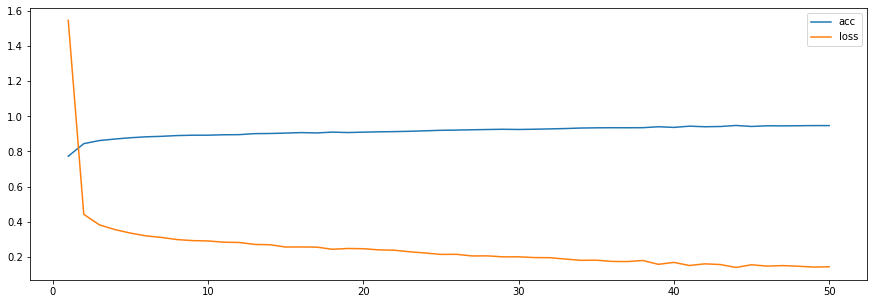

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 51, 1),
         h2.history['acc'],
         label='acc'
         )

plt.plot(range(1, 51, 1),
         h2.history['loss'],
         label='loss'
         )

plt.legend()
plt.show()

In [ ]:
# 모델 평가
md2.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.5038 - acc: 0.8833


[0.503771185874939, 0.8833000063896179]

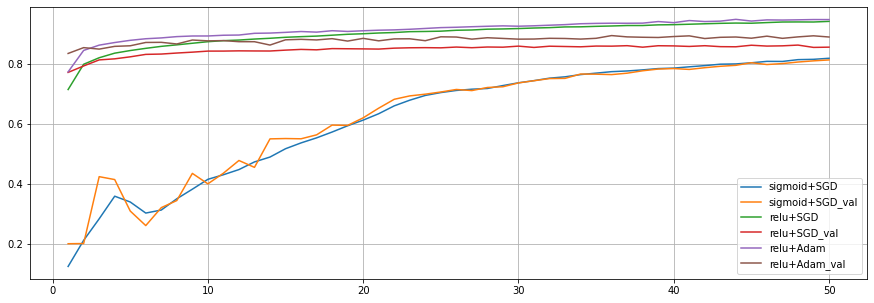

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 51, 1),
         h.history['acc'],
         label='sigmoid+SGD'
         )
plt.plot(range(1, 51, 1),
         h.history['val_acc'],
         label='sigmoid+SGD_val'
         )
plt.plot(range(1, 51, 1),
         h1.history['acc'],
         label='relu+SGD'
         )
plt.plot(range(1, 51, 1),
         h1.history['val_acc'],
         label='relu+SGD_val'
         )
plt.plot(range(1, 51, 1),
         h2.history['acc'],
         label='relu+Adam'
         )
plt.plot(range(1, 51, 1),
         h2.history['val_acc'],
         label='relu+Adam_val'
         )
plt.legend()
plt.grid()
plt.show()

### 최적화 모델 찾기
- 모델체크포인트 : 최적 모델을 저장
- 얼리스탑핑 : 조기 학습 중단(시간낭비방지, 과대적합방지)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# 1.모델 저장
#  저장경로 및 파일명 형태를 설정
save_path = '/content/drive/MyDrive/Colab Notebooks/빅데이터4차_딥러닝/model/FashionModel_{epoch:03d}_{val_acc:.4f}.hdf5'
# epoch는 keras에서 지정해 놓은 키워드
# d : 10진수 형태, 03 -> 0이 3개 붙어있는 형태의 자리수(002, 002, 003 ...)
# f : 소수점 형태, 4 -> 소수점 4자리까지 형태의 자리수(0.001, 0.002, 0.003 ...)
# hf5 : 모델이 저장되는 파일의 확장자명

f_mckp = ModelCheckpoint(filepath = save_path,   # 저장되는 파일의 경로를 설정
                         monitor = 'val_acc',    # 해당 값을 기준으로 파일을 저장
                         save_best_only = True,  # monitor값이 가장 최고점 혹은 최저점을 갱신 했을 때 모델을 저장
                         mode = 'max',           # save_best_only가 True일때 모니터링 하는 값의 최대, 최소를 결정
                         verbose = 1             # 모델 개선 및 저장 메시지를 표시해 줌
                         )

In [ ]:
# 2. 조기 학습 중단
f_early = EarlyStopping(monitor= "val_acc",
                        patience = 5              # monitor의 값 개선을 몇번이나 기다려줄지 설정
                         )

# 모델 학습시 val_acc가 5번의 epochs를 돌 동안 값이 개선이되지 않으면 중단시켜주세요~!                     

In [ ]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential     # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
md3 = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
md3.add(Flatten(input_shape=(28, 28))) # 즉 리쉐입이 필요가 없음


# 중간층
md3.add(Dense(300, activation="relu"))  # 하나의 층
md3.add(Dense(400, activation="relu"))  # 하나의 층
md3.add(Dense(300, activation="relu"))  # 하나의 층
md3.add(Dense(100, activation="relu"))  # 하나의 층


# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
md3.add(Dense(10, activation="softmax"))

md3.summary()


md3.compile(loss="categorical_crossentropy",
           optimizer = "Adam",          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

h3 = md3.fit(X_train,y_train_one_hot,
           validation_split=0.2,
           epochs=50, batch_size = 128,
           callbacks=[f_mckp, f_early],    # 모델체크포인트, 얼리스탑핑 설정
            verbose = 1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_21 (Dense)             (None, 400)               120400    
_________________________________________________________________
dense_22 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 507,310
Trainable params: 507,310
Non-trainable params: 0
________________________________________________

- 저장된 모델 로딩하기

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
best_md = load_model('/content/drive/MyDrive/Colab Notebooks/빅데이터4차_딥러닝/model/FashionModel_018_0.8861.hdf5')

In [ ]:
best_md.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.3837 - acc: 0.8803


[0.3837050795555115, 0.880299985408783]

In [ ]:
d